In [1]:
# Зашумить изображение при помощи шума гаусса, постоянного шума.

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [3]:
image1 = cv2.imread('sar_1.jpg')

In [4]:
image1_gray = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY) 

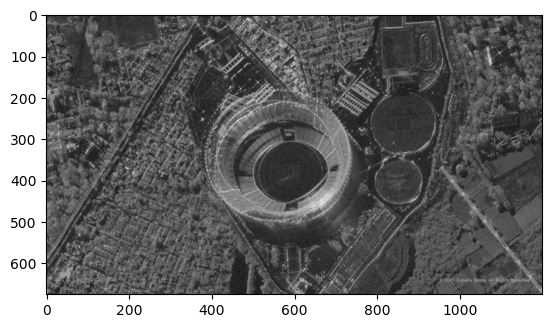

In [5]:
plt.imshow(image1_gray, cmap = "gray")

In [6]:
# Шум Гаусса

In [7]:
mean = 0
stdev = 110
noise_gauss = np.zeros(image1_gray.shape, np.uint8)
cv2.randn(noise_gauss, mean, stdev)

array([[  0,  17,   0, ..., 122,   0,  88],
       [  1, 114,  75, ...,   0, 114,   0],
       [  0,   0,  57, ...,   0,   0, 160],
       ...,
       [  0,   0,  43, ..., 255,   0,  16],
       [  0,  37,   0, ...,   0,   6, 148],
       [176, 224,   0, ...,  23,   0, 120]], dtype=uint8)

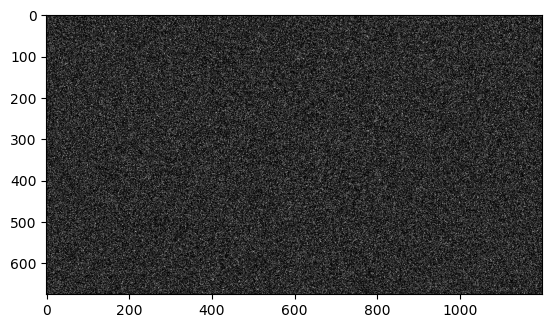

In [8]:
plt.imshow(noise_gauss, cmap="gray")

In [9]:
image_noise_gauss = image1_gray + noise_gauss

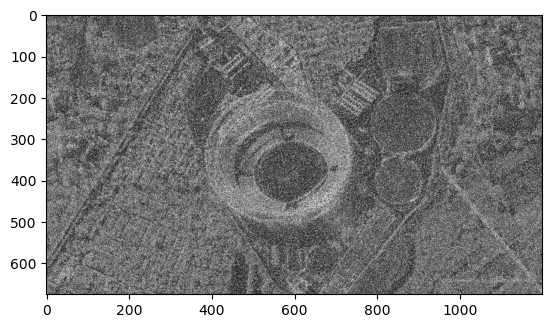

In [10]:
plt.imshow(image_noise_gauss, cmap="gray")

In [11]:
# Постоянный шум

In [12]:
a = 110
b = 0
mid = (a+b)/2

mean1 = mid
stdev1 = a-mid
noise_constant = np.zeros(image1_gray.shape, np.uint8)
cv2.randn(noise_constant, mean1, stdev1)

array([[ 29, 101,  98, ...,   0, 202, 127],
       [ 89,  70,  67, ..., 113,  59, 116],
       [ 70,  33,  86, ..., 125, 135,  44],
       ...,
       [  0,  38, 130, ...,  83, 119, 128],
       [ 78,  64,  73, ...,  80,  53, 100],
       [134, 142,  15, ...,  69,  32, 148]], dtype=uint8)

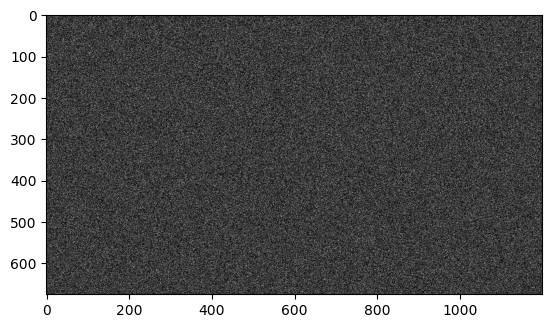

In [13]:
plt.imshow(noise_constant, cmap="gray")

In [14]:
image_noise_constant = image1_gray + noise_constant

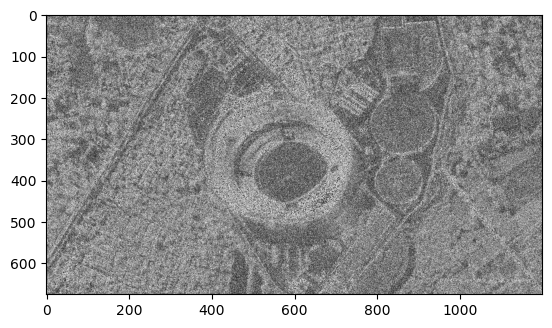

In [15]:
plt.imshow(image_noise_constant, cmap="gray")

In [16]:
# Шум соль-перец

In [17]:
noise_sp =  np.random.randint(0, 110, size = (image1_gray.shape[0], image1_gray.shape[1]), dtype=int)
zeros_pixel = np.where(noise_sp == 0)
ones_pixel = np.where(noise_sp == 100)

In [18]:
bg_image = np.ones(image1_gray.shape, np.uint8) * 128

In [19]:
bg_image[zeros_pixel] = 0
bg_image[ones_pixel] = 255

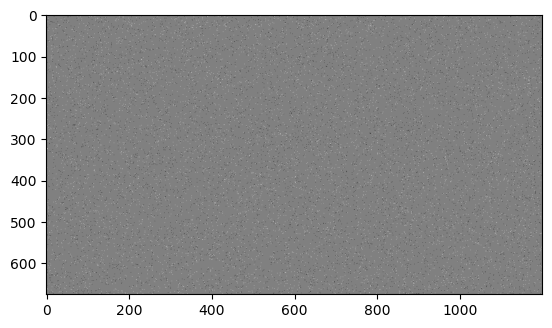

In [20]:
plt.imshow(bg_image, cmap="gray")

In [21]:
image_noise_sp = image1_gray + noise_sp

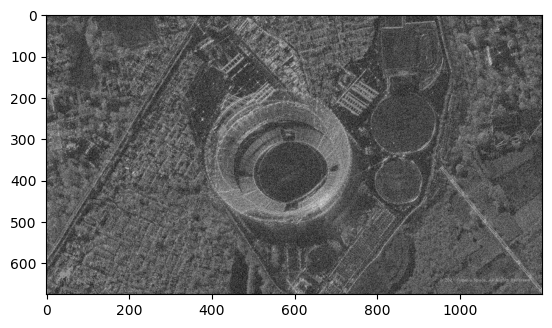

In [22]:
plt.imshow(image_noise_sp, cmap="gray")

In [23]:
# Протестировать медианный фильтр, фильтр гаусса, билатериальный фильтр, фильтр нелокальных средних с различными параметрами.

In [24]:
# Медианный фильтр

In [25]:
from skimage.metrics import structural_similarity, mean_squared_error

In [26]:
# Сравнение: зашумлённое (шум Гаусса) и исходное изображение
mse_gauss = mean_squared_error(image1_gray, image_noise_gauss)
(ssim_gauss, diff) = structural_similarity(image1_gray, image_noise_gauss, full=True)
print(mse_gauss, ssim_gauss)

3563.1211555555556 0.15545442994021116


In [27]:
# Сравнение: зашумлённое (постоянный шум) и исходное изображение
mse_constant = mean_squared_error(image1_gray, image_noise_constant)
(ssim_constant, diff) = structural_similarity(image1_gray, image_noise_constant, full=True)
print(mse_constant, ssim_constant)

5406.52117654321 0.13729035695073863


In [28]:
image_gauss_median = cv2.medianBlur(image_noise_gauss, 3)

In [29]:
image_constant_median = cv2.medianBlur(image_noise_constant, 3)

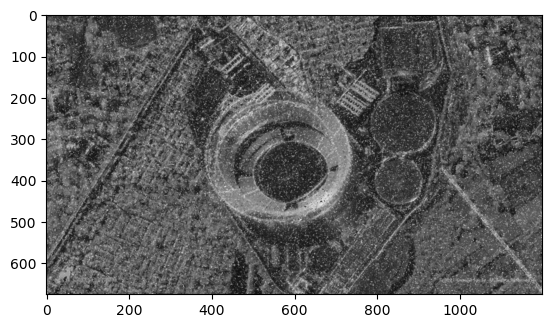

In [30]:
plt.imshow(image_gauss_median, cmap="gray")

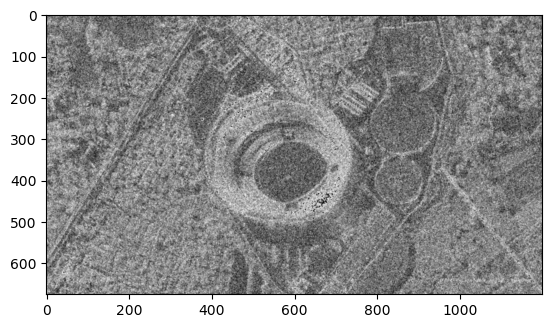

In [31]:
plt.imshow(image_constant_median, cmap="gray")

In [32]:
# Сравнение: исходное и отфильтрованное (гауссовский шум, медианный фильтр) изображение
mse_gauss_median_cleared = mean_squared_error(image1_gray, image_gauss_median)
(ssim_gauss_median_cleared, diff) = structural_similarity(image1_gray, image_gauss_median, full=True)
print(mse_gauss_median_cleared, ssim_gauss_median_cleared)

722.475149382716 0.4538273698436858


In [33]:
# Сравнение: исходное и отфильтрованное (постоянный шум, медианный фильтр) изображение
mse_constant_median_cleared = mean_squared_error(image1_gray, image_constant_median)
(ssim_constant_median_cleared, diff) = structural_similarity(image1_gray, image_constant_median, full=True)
print(mse_constant_median_cleared, ssim_constant_median_cleared)

3274.839475308642 0.3116543001738666


In [34]:
# Фильтр Гаусса

In [35]:
image_gauss_gauss = cv2.GaussianBlur(image_noise_gauss,(5,5),0)

In [36]:
image_constant_gauss = cv2.GaussianBlur(image_noise_constant,(5,5),0)

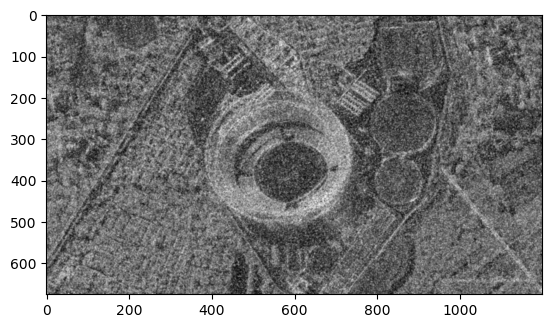

In [37]:
plt.imshow(image_gauss_gauss, cmap="gray")

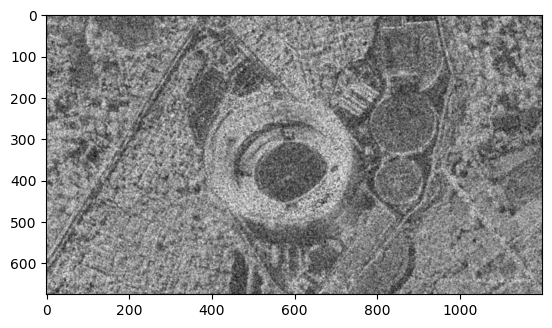

In [38]:
plt.imshow(image_constant_gauss, cmap="gray")

In [39]:
# Сравнение: исходное и отфильтрованное (гауссовский шум, фильтр Гаусса) изображение
mse_gauss_gauss_cleared = mean_squared_error(image1_gray, image_gauss_gauss)
(ssim_gauss_gauss_cleared, diff) = structural_similarity(image1_gray, image_gauss_gauss, full=True)
print(mse_gauss_gauss_cleared, ssim_gauss_gauss_cleared)

1216.6419407407407 0.4325970255709457


In [40]:
# Сравнение: исходное и отфильтрованное (постоянный шум, фильтр Гаусса) изображение
mse_constant_gauss_cleared = mean_squared_error(image1_gray, image_constant_gauss)
(ssim_constant_gauss_cleared, diff) = structural_similarity(image1_gray, image_constant_gauss, full=True)
print(mse_constant_gauss_cleared, ssim_constant_gauss_cleared)

3186.9474641975307 0.3925272164310304


In [41]:
# Билатериальный фильтр (на примере гауссовского шума)

In [42]:
image_gauss_bilat_1 = cv2.bilateralFilter(image_noise_gauss,49,150,150)

In [43]:
image_gauss_bilat_2 = cv2.bilateralFilter(image_noise_gauss,25,150,150)

In [44]:
image_gauss_bilat_3 = cv2.bilateralFilter(image_noise_gauss,9,150,150)

In [45]:
image_gauss_bilat_4 = cv2.bilateralFilter(image_noise_gauss,9,75,75)

In [46]:
# Сравнение: исходное и отфильтрованное (гауссовский шум, фильтр Гаусса) изображение
mse_gauss_bilat_cleared_1 = mean_squared_error(image1_gray, image_gauss_bilat_1)
(ssim_gauss_bilat_cleared_1, diff) = structural_similarity(image1_gray, image_gauss_bilat_1, full=True)
print(mse_gauss_bilat_cleared_1, ssim_gauss_bilat_cleared_1)

1277.5124740740741 0.2821560176737664


In [47]:
# Сравнение: исходное и отфильтрованное (гауссовский шум, фильтр Гаусса) изображение
mse_gauss_bilat_cleared_2 = mean_squared_error(image1_gray, image_gauss_bilat_2)
(ssim_gauss_bilat_cleared_2, diff) = structural_similarity(image1_gray, image_gauss_bilat_2, full=True)
print(mse_gauss_bilat_cleared_2, ssim_gauss_bilat_cleared_2)

1196.2125222222223 0.29476651286369254


In [48]:
# Сравнение: исходное и отфильтрованное (гауссовский шум, фильтр Гаусса) изображение
mse_gauss_bilat_cleared_3 = mean_squared_error(image1_gray, image_gauss_bilat_3)
(ssim_gauss_bilat_cleared_3, diff) = structural_similarity(image1_gray, image_gauss_bilat_3, full=True)
print(mse_gauss_bilat_cleared_3, ssim_gauss_bilat_cleared_3)

1075.0680185185186 0.40168140982978584


In [49]:
# Сравнение: исходное и отфильтрованное (гауссовский шум, фильтр Гаусса) изображение
mse_gauss_bilat_cleared_4 = mean_squared_error(image1_gray, image_gauss_bilat_4)
(ssim_gauss_bilat_cleared_4, diff) = structural_similarity(image1_gray, image_gauss_bilat_4, full=True)
print(mse_gauss_bilat_cleared_4, ssim_gauss_bilat_cleared_4)

1296.8504765432099 0.298701417709512


In [50]:
# Фильтр нелокальных средних (на примере гауссовского шума)

In [51]:
image_gauss_nlm_1 = cv2.fastNlMeansDenoising(image_noise_gauss, h = 20)

In [52]:
image_gauss_nlm_2 = cv2.fastNlMeansDenoising(image_noise_gauss, h = 120)

In [53]:
image_gauss_nlm_3 = cv2.fastNlMeansDenoising(image_noise_gauss, h = 2)

In [54]:
# Сравнение: исходное и отфильтрованное (гауссовский шум, фильтр Гаусса) изображение
mse_gauss_nlm_cleared_1 = mean_squared_error(image1_gray, image_gauss_nlm_1)
(ssim_gauss_nlm_cleared_1, diff) = structural_similarity(image1_gray, image_gauss_nlm_1, full=True)
print(mse_gauss_nlm_cleared_1, ssim_gauss_nlm_cleared_1)

3557.8316777777777 0.15565741070147426


In [55]:
# Сравнение: исходное и отфильтрованное (гауссовский шум, фильтр Гаусса) изображение
mse_gauss_nlm_cleared_2 = mean_squared_error(image1_gray, image_gauss_nlm_2)
(ssim_gauss_nlm_cleared_2, diff) = structural_similarity(image1_gray, image_gauss_nlm_2, full=True)
print(mse_gauss_nlm_cleared_2, ssim_gauss_nlm_cleared_2)

1338.0881543209875 0.24829356626555155


In [56]:
# Сравнение: исходное и отфильтрованное (гауссовский шум, фильтр Гаусса) изображение
mse_gauss_nlm_cleared_3 = mean_squared_error(image1_gray, image_gauss_nlm_3)
(ssim_gauss_nlm_cleared_3, diff) = structural_similarity(image1_gray, image_gauss_nlm_3, full=True)
print(mse_gauss_nlm_cleared_3, ssim_gauss_nlm_cleared_3)

3563.1211555555556 0.15545442994021116


In [57]:
# Выяснить, какой фильтр показал лучший результат фильтрации шума.

In [58]:
# На примере шума Гаусса

In [59]:
# image_gauss_median (медианный) - лучший

In [60]:
print(mse_gauss_median_cleared, ssim_gauss_median_cleared)

722.475149382716 0.4538273698436858


In [61]:
# image_gauss_gauss (гауссовский)

In [62]:
print(mse_gauss_gauss_cleared, ssim_gauss_gauss_cleared)

1216.6419407407407 0.4325970255709457


In [63]:
# image_gauss_bilat_3 (билатериальный)

In [64]:
print(mse_gauss_bilat_cleared_3, ssim_gauss_bilat_cleared_3)

1075.0680185185186 0.40168140982978584


In [65]:
# image_gauss_nlm_2 (нелокальных средних)

In [66]:
print(mse_gauss_nlm_cleared_2, ssim_gauss_nlm_cleared_2)

1338.0881543209875 0.24829356626555155
